# 2. Classification

In [1]:
# Run this code to make Jupyter print every
# printable statement and not just the last one
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To visualize the data
import matplotlib.pyplot as plt

# Generic libraries
import seaborn as sns
import pandas as pd
import numpy as np

# Regression models
import sklearn
import scipy
from scipy.stats import *
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV #split the data into training and test
from sklearn.linear_model import LinearRegression #linear regression
from sklearn.preprocessing import PolynomialFeatures #for polynomial regression
from sklearn.metrics import r2_score, mean_squared_error

# 5-folds crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline

#classification
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

## Preprocessing

In [2]:
training_set = pd.read_csv("online_shoppers_intention.csv")

#test_set = pd.read_csv("test_set_complete.csv")
#training_set = training_set.drop(columns=['Unnamed: 0'])
#test_set = test_set.drop(columns=['Unnamed: 0'])
#training_set['Revenue'] = training_set['Revenue'].astype(int)

# DA TOGLIERE UNA VOLTA CHE UNIAMO I NOTEBOOK!!!!

training_set['Month']=training_set['Month'].astype('category')
training_set['OperatingSystems']=training_set['OperatingSystems'].astype('category')
training_set['Browser']=training_set['Browser'].astype('category')
training_set['Region']=training_set['Region'].astype('category')
training_set['TrafficType']=training_set['TrafficType'].astype('category')
training_set['VisitorType']=training_set['VisitorType'].astype('category')
training_set['Weekend']=training_set['Weekend'].astype('category')
#training_set['Revenue']=training_set['Revenue'].astype('category')


# We uniform the categories between training and test set

all_categories_browser = list(range(1,14))
all_categories_traffic_type = list(range(1,21))
training_set['Browser'] = training_set['Browser'].cat.set_categories(all_categories_browser)
training_set['TrafficType'] = training_set['TrafficType'].cat.set_categories(all_categories_traffic_type)
#training_set['Weekend'] = np.where(training_set['Weekend']=='True',1,0)

training_set = pd.get_dummies(training_set, columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend'], drop_first=False)



#test_set['Revenue'] = test_set['Revenue'].astype(int)
#training_set['Revenue'].value_counts()
#test_set['Revenue'].value_counts()
categorical_features = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']
#training_set[categorical_features] = training_set[categorical_features].astype('category')
#test_set[categorical_features] = test_set[categorical_features].astype('category')

In [3]:
X_train_full = training_set.drop(columns=['Revenue'])
#X_test_full = test_set.drop(columns=['Revenue'])
y_train = training_set['Revenue']
#y_test = test_set['Revenue']

### Variance selection
We apply variance selection to remove all the features with a very low variance.

In [4]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.001  # Soglia di varianza desiderata
variance_selector = VarianceThreshold(threshold=threshold)

# Applicazione della selezione della varianza sul dataset

X_train = X_train_full.loc[:, variance_selector.fit(X_train_full).get_support()]
columns_remaining = X_train.columns.tolist()

#X_test = X_test_full[columns_remaining]
print(X_train.columns.tolist())
len(columns_remaining)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_19', 'TrafficType_20', 'VisitorType_New_Visitor', '

66

### Functions and algorithms

#### Feature selection: Forward stepwise selection
We chose this algorithm because it's more scalable on a big dataset.

In [5]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator   

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=0)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator


possible_models = {
    "LogisticRegression":LogisticRegression(solver="newton-cg", max_iter=1000),
    "LDA":LDA(),
    "QDA":QDA(),
    #"KNN":KNeighborsClassifier(n_neighbors=6),
    "LinearRegression":LinearRegression(fit_intercept=True),
    "SVM":LinearSVC(C=0.1,max_iter=1000)
}

#da qui inizia il ctrl Z

def forward_selection(Xtrain_pd, ytrain, model_chosen,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0):   
    
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    
    
    for dim in range(num_features):
        candidate_metrics = [] # metrics for all the models with dim features
        candidate_models = []  # models with dim features
        
        remaining_features = all_features.difference(selected_features)
        
        # fit all the models with k features
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = possible_models[model_chosen]
            #print(new_column)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        
        idx_best_candidate = candidates_argbest(candidate_metrics) # select the best Mk model
        selected_features.append(remaining_features[idx_best_candidate]) # Update selected feature
        best_candidate_metric.append(candidate_metrics[idx_best_candidate]) # Save best candidate features
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Compute metric for the final step -> comparison of all the best models
        best_subset_model = candidate_models[idx_best_candidate] # save the best model
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score) #computing the metrics for the training set
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim+1, dim+1, best_features))
            print("M{} subset score (3.): {}".format(dim+1, score))
        
    # choose the best candidates
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n Best configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    return best_features
    

#### Accuracy

In [6]:
def accuracy(y_pred, y_true):
    return (y_pred == y_true).mean()

def calculate_sensitivity_specificity(confusion_matrix):
    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion_matrix.ravel()

    # Calculate Sensitivity (Recall)
    sensitivity = TP / (TP + FN)

    # Calculate Specificity
    specificity = TN / (TN + FP)

    return sensitivity, specificity

#### Evaluation metrics

In [7]:
from sklearn.metrics import confusion_matrix

def classification_metrics_training(model, model_name, X_train, y_train, cv):
    #sensitivity
    sensitivity_train = np.mean(np.absolute(cross_val_score(model, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1)))
    
    #specificity
    specificity_train = np.mean(np.absolute(cross_val_score(model, X_train, y_train, cv=cv, scoring='precision', n_jobs=-1)))
    
    #accuracy
    accuracy_train = np.mean(np.absolute(cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)))
                         
    # building a dataframe
    data = {
        'Model': [model_name],
        'Accuracy': [accuracy_train],
        'Sensitivity': [sensitivity_train],
        'Specificity': [specificity_train],
    }
    return pd.DataFrame(data)                    

In [8]:
def classification_metrics_test(model, model_name,X_train,y_train,X_test,y_test,threshold):
    # building the confusion matrix for test performances
    model = model.fit(X_train,y_train)
    #ypred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class (class 1)

    # Convert probabilities to binary predictions
    ypred = (y_pred_proba > threshold).astype(int)
    
    cm = confusion_matrix(y_test.to_numpy(), np.array(ypred))
    sensitivity_test, specificity_test = calculate_sensitivity_specificity(cm)
    
    accuracy_test = accuracy(ypred, y_test)
    
    # building a dataframe
    data = {
        'Model': [model_name],
        'Accuracy': [accuracy_test],
        'Sensitivity': [sensitivity_test],
        'Specificity': [specificity_test],
    }
    return pd.DataFrame(data), cm

In [9]:
# We compute the empirical threshold
empirical_threshold = y_train.mean()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def classification_metrics_empirical_threshold(model, model_name, X_train, y_train,threshold=0.5):
    
    model = model.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_pred_proba = model.predict_proba(X_train)[:, 1]  # Probability of positive class (class 1)

    # Convert probabilities to binary predictions
    y_pred = (y_pred_proba > threshold).astype(int)

    # Evaluate the performance using various metrics
    accuracy = accuracy_score(y_train, y_pred)
    specificity = precision_score(y_train, y_pred)
    sensitivity = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    
    data = {
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Sensitivity': [sensitivity],
        'Specificity': [specificity],
    }
    return pd.DataFrame(data) 


## Logistic regression

### Scaling data
We scale the numerical features to avoid convergence problem with logistic regression.

In [10]:
# FACCIAMO QUESTO STEP PER EVITARE PROBLEMI DI CONVERGENZA NEL MODELLO
from sklearn.preprocessing import StandardScaler

# Assuming you have your feature data X
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical_features = ['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 
                        'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5',
                        'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 
                        'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 
                        'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 
                        'TrafficType_15', 'TrafficType_19', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True']
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_features]))
#test_scaled = pd.DataFrame(scaler.fit_transform(X_test[numeric_features]))
train_scaled.columns = X_train[numeric_features].columns
#test_scaled.columns = X_test[numeric_features].columns
X_train_scaled = pd.concat([train_scaled,X_train[categorical_features]],axis=1)
#X_test_scaled = pd.concat([test_scaled,X_test[categorical_features]],axis=1)

### Feature selection

In [11]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
features_logistic = forward_selection(X_train_scaled, y_train, "LogisticRegression",
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv.n_splits)
features_logistic

............
Best model (M1) with 1 features: ['PageValues']
M1 subset score (3.): 0.8828872668288728
............
Best model (M2) with 2 features: ['PageValues', 'VisitorType_New_Visitor']
M2 subset score (3.): 0.8846715328467154
............
Best model (M3) with 3 features: ['PageValues', 'VisitorType_New_Visitor', 'Region_2']
M3 subset score (3.): 0.8849959448499595
............
Best model (M4) with 4 features: ['PageValues', 'VisitorType_New_Visitor', 'Region_2', 'Browser_3']
M4 subset score (3.): 0.8850770478507706
............
Best model (M5) with 5 features: ['PageValues', 'VisitorType_New_Visitor', 'Region_2', 'Browser_3', 'Browser_7']
M5 subset score (3.): 0.8850770478507706
............
Best model (M6) with 6 features: ['PageValues', 'VisitorType_New_Visitor', 'Region_2', 'Browser_3', 'Browser_7', 'OperatingSystems_8']
M6 subset score (3.): 0.8850770478507706
............
Best model (M7) with 7 features: ['PageValues', 'VisitorType_New_Visitor', 'Region_2', 'Browser_3', 'Brow

............
Best model (M28) with 28 features: ['PageValues', 'VisitorType_New_Visitor', 'Region_2', 'Browser_3', 'Browser_7', 'OperatingSystems_8', 'TrafficType_5', 'Browser_13', 'Browser_8', 'Region_7', 'TrafficType_19', 'VisitorType_Other', 'Region_3', 'Month_Aug', 'Browser_6', 'Browser_2', 'Month_Feb', 'TrafficType_9', 'VisitorType_Returning_Visitor', 'Region_6', 'TrafficType_11', 'OperatingSystems_6', 'TrafficType_15', 'Browser_4', 'Month_June', 'Month_Oct', 'OperatingSystems_1', 'Month_Jul']
M28 subset score (3.): 0.8848337388483373
............
Best model (M29) with 29 features: ['PageValues', 'VisitorType_New_Visitor', 'Region_2', 'Browser_3', 'Browser_7', 'OperatingSystems_8', 'TrafficType_5', 'Browser_13', 'Browser_8', 'Region_7', 'TrafficType_19', 'VisitorType_Other', 'Region_3', 'Month_Aug', 'Browser_6', 'Browser_2', 'Month_Feb', 'TrafficType_9', 'VisitorType_Returning_Visitor', 'Region_6', 'TrafficType_11', 'OperatingSystems_6', 'TrafficType_15', 'Browser_4', 'Month_June'

............
Best model (M41) with 41 features: ['PageValues', 'VisitorType_New_Visitor', 'Region_2', 'Browser_3', 'Browser_7', 'OperatingSystems_8', 'TrafficType_5', 'Browser_13', 'Browser_8', 'Region_7', 'TrafficType_19', 'VisitorType_Other', 'Region_3', 'Month_Aug', 'Browser_6', 'Browser_2', 'Month_Feb', 'TrafficType_9', 'VisitorType_Returning_Visitor', 'Region_6', 'TrafficType_11', 'OperatingSystems_6', 'TrafficType_15', 'Browser_4', 'Month_June', 'Month_Oct', 'OperatingSystems_1', 'Month_Jul', 'Region_8', 'Region_9', 'TrafficType_10', 'Browser_10', 'Month_Dec', 'Month_Sep', 'TrafficType_6', 'OperatingSystems_4', 'BounceRates', 'Weekend_False', 'TrafficType_8', 'Browser_5', 'TrafficType_1']
M41 subset score (3.): 0.8856447688564477
............
Best model (M42) with 42 features: ['PageValues', 'VisitorType_New_Visitor', 'Region_2', 'Browser_3', 'Browser_7', 'OperatingSystems_8', 'TrafficType_5', 'Browser_13', 'Browser_8', 'Region_7', 'TrafficType_19', 'VisitorType_Other', 'Region_3

............
Best model (M52) with 52 features: ['PageValues', 'VisitorType_New_Visitor', 'Region_2', 'Browser_3', 'Browser_7', 'OperatingSystems_8', 'TrafficType_5', 'Browser_13', 'Browser_8', 'Region_7', 'TrafficType_19', 'VisitorType_Other', 'Region_3', 'Month_Aug', 'Browser_6', 'Browser_2', 'Month_Feb', 'TrafficType_9', 'VisitorType_Returning_Visitor', 'Region_6', 'TrafficType_11', 'OperatingSystems_6', 'TrafficType_15', 'Browser_4', 'Month_June', 'Month_Oct', 'OperatingSystems_1', 'Month_Jul', 'Region_8', 'Region_9', 'TrafficType_10', 'Browser_10', 'Month_Dec', 'Month_Sep', 'TrafficType_6', 'OperatingSystems_4', 'BounceRates', 'Weekend_False', 'TrafficType_8', 'Browser_5', 'TrafficType_1', 'Browser_1', 'TrafficType_7', 'TrafficType_20', 'Weekend_True', 'SpecialDay', 'ExitRates', 'TrafficType_3', 'TrafficType_13', 'OperatingSystems_3', 'Region_1', 'OperatingSystems_2']
M52 subset score (3.): 0.8863746958637468
............
Best model (M53) with 53 features: ['PageValues', 'VisitorT

............
Best model (M61) with 61 features: ['PageValues', 'VisitorType_New_Visitor', 'Region_2', 'Browser_3', 'Browser_7', 'OperatingSystems_8', 'TrafficType_5', 'Browser_13', 'Browser_8', 'Region_7', 'TrafficType_19', 'VisitorType_Other', 'Region_3', 'Month_Aug', 'Browser_6', 'Browser_2', 'Month_Feb', 'TrafficType_9', 'VisitorType_Returning_Visitor', 'Region_6', 'TrafficType_11', 'OperatingSystems_6', 'TrafficType_15', 'Browser_4', 'Month_June', 'Month_Oct', 'OperatingSystems_1', 'Month_Jul', 'Region_8', 'Region_9', 'TrafficType_10', 'Browser_10', 'Month_Dec', 'Month_Sep', 'TrafficType_6', 'OperatingSystems_4', 'BounceRates', 'Weekend_False', 'TrafficType_8', 'Browser_5', 'TrafficType_1', 'Browser_1', 'TrafficType_7', 'TrafficType_20', 'Weekend_True', 'SpecialDay', 'ExitRates', 'TrafficType_3', 'TrafficType_13', 'OperatingSystems_3', 'Region_1', 'OperatingSystems_2', 'Region_4', 'Region_5', 'TrafficType_4', 'TrafficType_2', 'Informational_Duration', 'Administrative_Duration', 'Pr

['PageValues',
 'VisitorType_New_Visitor',
 'Region_2',
 'Browser_3',
 'Browser_7',
 'OperatingSystems_8',
 'TrafficType_5',
 'Browser_13',
 'Browser_8',
 'Region_7',
 'TrafficType_19',
 'VisitorType_Other',
 'Region_3',
 'Month_Aug',
 'Browser_6',
 'Browser_2',
 'Month_Feb',
 'TrafficType_9',
 'VisitorType_Returning_Visitor',
 'Region_6',
 'TrafficType_11',
 'OperatingSystems_6',
 'TrafficType_15',
 'Browser_4',
 'Month_June',
 'Month_Oct',
 'OperatingSystems_1',
 'Month_Jul',
 'Region_8',
 'Region_9',
 'TrafficType_10',
 'Browser_10',
 'Month_Dec',
 'Month_Sep',
 'TrafficType_6',
 'OperatingSystems_4',
 'BounceRates',
 'Weekend_False',
 'TrafficType_8',
 'Browser_5',
 'TrafficType_1',
 'Browser_1',
 'TrafficType_7',
 'TrafficType_20',
 'Weekend_True',
 'SpecialDay',
 'ExitRates',
 'TrafficType_3',
 'TrafficType_13',
 'OperatingSystems_3',
 'Region_1']

### Evaluation Metrics

In [12]:
model_logistic = LogisticRegression(solver="newton-cg",penalty="none",max_iter=1000)
train_scores_logistic = classification_metrics_training(model_logistic, "LogisticRegression", X_train_scaled[features_logistic], y_train,cv)
train_scores_logistic

,Model,Accuracy,Sensitivity,Specificity
0,LogisticRegression,0.885807,0.375886,0.768263


The sensitivity is very low, we try to improve it using the empirical threshold

In [13]:
train_scores_logistic_empirical = classification_metrics_empirical_threshold(model_logistic, 'LogisticRegression', X_train_scaled[features_logistic], y_train,empirical_threshold)
train_scores_logistic_empirical

,Model,Accuracy,Sensitivity,Specificity
0,LogisticRegression,0.832279,0.748428,0.473475


# LDA

### Feature selection

In [14]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
features_LDA = forward_selection(X_train_scaled, y_train, "LDA",
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv.n_splits)
features_LDA

............
Best model (M1) with 1 features: ['PageValues']
M1 subset score (3.): 0.8789943227899432
............
Best model (M2) with 2 features: ['PageValues', 'ExitRates']
M2 subset score (3.): 0.8815085158150853
............
Best model (M3) with 3 features: ['PageValues', 'ExitRates', 'Administrative_Duration']
M3 subset score (3.): 0.8812652068126521
............
Best model (M4) with 4 features: ['PageValues', 'ExitRates', 'Administrative_Duration', 'VisitorType_Other']
M4 subset score (3.): 0.8813463098134632
............
Best model (M5) with 5 features: ['PageValues', 'ExitRates', 'Administrative_Duration', 'VisitorType_Other', 'Browser_1']
M5 subset score (3.): 0.8814274128142742
............
Best model (M6) with 6 features: ['PageValues', 'ExitRates', 'Administrative_Duration', 'VisitorType_Other', 'Browser_1', 'Browser_13']
M6 subset score (3.): 0.8812652068126521
............
Best model (M7) with 7 features: ['PageValues', 'ExitRates', 'Administrative_Duration', 'VisitorTyp

............
Best model (M28) with 28 features: ['PageValues', 'ExitRates', 'Administrative_Duration', 'VisitorType_Other', 'Browser_1', 'Browser_13', 'Month_Aug', 'OperatingSystems_4', 'Browser_3', 'Browser_4', 'Month_Feb', 'Browser_7', 'Month_June', 'OperatingSystems_6', 'Month_Jul', 'OperatingSystems_8', 'Region_4', 'Browser_8', 'OperatingSystems_1', 'TrafficType_19', 'TrafficType_15', 'TrafficType_9', 'Browser_2', 'Browser_10', 'Region_7', 'Month_Sep', 'Region_2', 'Region_3']
M28 subset score (3.): 0.8817518248175183
............
Best model (M29) with 29 features: ['PageValues', 'ExitRates', 'Administrative_Duration', 'VisitorType_Other', 'Browser_1', 'Browser_13', 'Month_Aug', 'OperatingSystems_4', 'Browser_3', 'Browser_4', 'Month_Feb', 'Browser_7', 'Month_June', 'OperatingSystems_6', 'Month_Jul', 'OperatingSystems_8', 'Region_4', 'Browser_8', 'OperatingSystems_1', 'TrafficType_19', 'TrafficType_15', 'TrafficType_9', 'Browser_2', 'Browser_10', 'Region_7', 'Month_Sep', 'Region_2', 

............
Best model (M42) with 42 features: ['PageValues', 'ExitRates', 'Administrative_Duration', 'VisitorType_Other', 'Browser_1', 'Browser_13', 'Month_Aug', 'OperatingSystems_4', 'Browser_3', 'Browser_4', 'Month_Feb', 'Browser_7', 'Month_June', 'OperatingSystems_6', 'Month_Jul', 'OperatingSystems_8', 'Region_4', 'Browser_8', 'OperatingSystems_1', 'TrafficType_19', 'TrafficType_15', 'TrafficType_9', 'Browser_2', 'Browser_10', 'Region_7', 'Month_Sep', 'Region_2', 'Region_3', 'TrafficType_4', 'TrafficType_5', 'Month_Oct', 'TrafficType_20', 'SpecialDay', 'TrafficType_10', 'Browser_6', 'Browser_5', 'Region_9', 'TrafficType_6', 'BounceRates', 'TrafficType_7', 'TrafficType_11', 'Region_5']
M42 subset score (3.): 0.8808596918085969
............
Best model (M43) with 43 features: ['PageValues', 'ExitRates', 'Administrative_Duration', 'VisitorType_Other', 'Browser_1', 'Browser_13', 'Month_Aug', 'OperatingSystems_4', 'Browser_3', 'Browser_4', 'Month_Feb', 'Browser_7', 'Month_June', 'Operat

............
Best model (M53) with 53 features: ['PageValues', 'ExitRates', 'Administrative_Duration', 'VisitorType_Other', 'Browser_1', 'Browser_13', 'Month_Aug', 'OperatingSystems_4', 'Browser_3', 'Browser_4', 'Month_Feb', 'Browser_7', 'Month_June', 'OperatingSystems_6', 'Month_Jul', 'OperatingSystems_8', 'Region_4', 'Browser_8', 'OperatingSystems_1', 'TrafficType_19', 'TrafficType_15', 'TrafficType_9', 'Browser_2', 'Browser_10', 'Region_7', 'Month_Sep', 'Region_2', 'Region_3', 'TrafficType_4', 'TrafficType_5', 'Month_Oct', 'TrafficType_20', 'SpecialDay', 'TrafficType_10', 'Browser_6', 'Browser_5', 'Region_9', 'TrafficType_6', 'BounceRates', 'TrafficType_7', 'TrafficType_11', 'Region_5', 'TrafficType_8', 'Month_Mar', 'Region_6', 'Month_Dec', 'OperatingSystems_2', 'OperatingSystems_3', 'Region_1', 'Region_8', 'TrafficType_13', 'VisitorType_New_Visitor', 'Weekend_False']
M53 subset score (3.): 0.8814274128142742
............
Best model (M54) with 54 features: ['PageValues', 'ExitRates'

............
Best model (M62) with 62 features: ['PageValues', 'ExitRates', 'Administrative_Duration', 'VisitorType_Other', 'Browser_1', 'Browser_13', 'Month_Aug', 'OperatingSystems_4', 'Browser_3', 'Browser_4', 'Month_Feb', 'Browser_7', 'Month_June', 'OperatingSystems_6', 'Month_Jul', 'OperatingSystems_8', 'Region_4', 'Browser_8', 'OperatingSystems_1', 'TrafficType_19', 'TrafficType_15', 'TrafficType_9', 'Browser_2', 'Browser_10', 'Region_7', 'Month_Sep', 'Region_2', 'Region_3', 'TrafficType_4', 'TrafficType_5', 'Month_Oct', 'TrafficType_20', 'SpecialDay', 'TrafficType_10', 'Browser_6', 'Browser_5', 'Region_9', 'TrafficType_6', 'BounceRates', 'TrafficType_7', 'TrafficType_11', 'Region_5', 'TrafficType_8', 'Month_Mar', 'Region_6', 'Month_Dec', 'OperatingSystems_2', 'OperatingSystems_3', 'Region_1', 'Region_8', 'TrafficType_13', 'VisitorType_New_Visitor', 'Weekend_False', 'TrafficType_1', 'VisitorType_Returning_Visitor', 'Weekend_True', 'Informational_Duration', 'Informational', 'Month_

['PageValues',
 'ExitRates',
 'Administrative_Duration',
 'VisitorType_Other',
 'Browser_1',
 'Browser_13',
 'Month_Aug',
 'OperatingSystems_4',
 'Browser_3',
 'Browser_4',
 'Month_Feb']

### Evaluation metrics

In [15]:
model_LDA =LDA(store_covariance=True)
train_scores_LDA = classification_metrics_training(model_LDA, "LDA", X_train_scaled[features_LDA], y_train, cv)
train_scores_LDA

,Model,Accuracy,Sensitivity,Specificity
0,LDA,0.881752,0.32734,0.781677


We try to improve the sensitivity by setting the empirical threshold

In [16]:
train_scores_LDA_empirical = classification_metrics_empirical_threshold(model_LDA, 'LDA', X_train_scaled[features_LDA], y_train,empirical_threshold)
train_scores_LDA_empirical

,Model,Accuracy,Sensitivity,Specificity
0,LDA,0.889862,0.568658,0.669753


## QDA

### Feature selection

In [17]:
#import warnings
#warnings.filterwarnings("ignore")
cv = KFold(n_splits=5, random_state=42, shuffle=True)
features_QDA = forward_selection(X_train_scaled, y_train, "QDA",
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv.n_splits)
features_QDA

............
Best model (M1) with 1 features: ['PageValues']
M1 subset score (3.): 0.8849148418491485
............
Best model (M2) with 2 features: ['PageValues', 'BounceRates']
M2 subset score (3.): 0.8893755068937551
............
Best model (M3) with 3 features: ['PageValues', 'BounceRates', 'VisitorType_New_Visitor']
M3 subset score (3.): 0.8916463909164639
............
Best model (M4) with 4 features: ['PageValues', 'BounceRates', 'VisitorType_New_Visitor', 'TrafficType_19']
M4 subset score (3.): 0.7437145174371451
............
Best model (M5) with 5 features: ['PageValues', 'BounceRates', 'VisitorType_New_Visitor', 'TrafficType_19', 'OperatingSystems_1']
M5 subset score (3.): 0.7438767234387672
............
Best model (M6) with 6 features: ['PageValues', 'BounceRates', 'VisitorType_New_Visitor', 'TrafficType_19', 'OperatingSystems_1', 'Region_7']
M6 subset score (3.): 0.8819140308191402
............
Best model (M7) with 7 features: ['PageValues', 'BounceRates', 'VisitorType_New_Vi

............
Best model (M28) with 28 features: ['PageValues', 'BounceRates', 'VisitorType_New_Visitor', 'TrafficType_19', 'OperatingSystems_1', 'Region_7', 'Region_6', 'Browser_8', 'TrafficType_7', 'Weekend_False', 'OperatingSystems_6', 'Browser_7', 'Region_4', 'Region_5', 'Month_Jul', 'TrafficType_4', 'Browser_13', 'VisitorType_Other', 'Region_9', 'Browser_4', 'Region_1', 'Region_3', 'TrafficType_2', 'TrafficType_20', 'Browser_2', 'OperatingSystems_2', 'Month_May', 'Browser_1']
M28 subset score (3.): 0.729764801297648
............
Best model (M29) with 29 features: ['PageValues', 'BounceRates', 'VisitorType_New_Visitor', 'TrafficType_19', 'OperatingSystems_1', 'Region_7', 'Region_6', 'Browser_8', 'TrafficType_7', 'Weekend_False', 'OperatingSystems_6', 'Browser_7', 'Region_4', 'Region_5', 'Month_Jul', 'TrafficType_4', 'Browser_13', 'VisitorType_Other', 'Region_9', 'Browser_4', 'Region_1', 'Region_3', 'TrafficType_2', 'TrafficType_20', 'Browser_2', 'OperatingSystems_2', 'Month_May', 'B

............
Best model (M41) with 41 features: ['PageValues', 'BounceRates', 'VisitorType_New_Visitor', 'TrafficType_19', 'OperatingSystems_1', 'Region_7', 'Region_6', 'Browser_8', 'TrafficType_7', 'Weekend_False', 'OperatingSystems_6', 'Browser_7', 'Region_4', 'Region_5', 'Month_Jul', 'TrafficType_4', 'Browser_13', 'VisitorType_Other', 'Region_9', 'Browser_4', 'Region_1', 'Region_3', 'TrafficType_2', 'TrafficType_20', 'Browser_2', 'OperatingSystems_2', 'Month_May', 'Browser_1', 'ProductRelated_Duration', 'VisitorType_Returning_Visitor', 'Region_2', 'Region_8', 'TrafficType_9', 'Month_June', 'Weekend_True', 'OperatingSystems_8', 'Month_Sep', 'Month_Mar', 'Month_Nov', 'OperatingSystems_4', 'Browser_10']
M41 subset score (3.): 0.6326034063260341
............
Best model (M42) with 42 features: ['PageValues', 'BounceRates', 'VisitorType_New_Visitor', 'TrafficType_19', 'OperatingSystems_1', 'Region_7', 'Region_6', 'Browser_8', 'TrafficType_7', 'Weekend_False', 'OperatingSystems_6', 'Browse

............
Best model (M51) with 51 features: ['PageValues', 'BounceRates', 'VisitorType_New_Visitor', 'TrafficType_19', 'OperatingSystems_1', 'Region_7', 'Region_6', 'Browser_8', 'TrafficType_7', 'Weekend_False', 'OperatingSystems_6', 'Browser_7', 'Region_4', 'Region_5', 'Month_Jul', 'TrafficType_4', 'Browser_13', 'VisitorType_Other', 'Region_9', 'Browser_4', 'Region_1', 'Region_3', 'TrafficType_2', 'TrafficType_20', 'Browser_2', 'OperatingSystems_2', 'Month_May', 'Browser_1', 'ProductRelated_Duration', 'VisitorType_Returning_Visitor', 'Region_2', 'Region_8', 'TrafficType_9', 'Month_June', 'Weekend_True', 'OperatingSystems_8', 'Month_Sep', 'Month_Mar', 'Month_Nov', 'OperatingSystems_4', 'Browser_10', 'Month_Dec', 'Informational', 'Informational_Duration', 'Administrative', 'SpecialDay', 'TrafficType_10', 'Browser_6', 'Month_Aug', 'TrafficType_6', 'ExitRates']
M51 subset score (3.): 0.6002433090024331
............
Best model (M52) with 52 features: ['PageValues', 'BounceRates', 'Visi

............
Best model (M60) with 60 features: ['PageValues', 'BounceRates', 'VisitorType_New_Visitor', 'TrafficType_19', 'OperatingSystems_1', 'Region_7', 'Region_6', 'Browser_8', 'TrafficType_7', 'Weekend_False', 'OperatingSystems_6', 'Browser_7', 'Region_4', 'Region_5', 'Month_Jul', 'TrafficType_4', 'Browser_13', 'VisitorType_Other', 'Region_9', 'Browser_4', 'Region_1', 'Region_3', 'TrafficType_2', 'TrafficType_20', 'Browser_2', 'OperatingSystems_2', 'Month_May', 'Browser_1', 'ProductRelated_Duration', 'VisitorType_Returning_Visitor', 'Region_2', 'Region_8', 'TrafficType_9', 'Month_June', 'Weekend_True', 'OperatingSystems_8', 'Month_Sep', 'Month_Mar', 'Month_Nov', 'OperatingSystems_4', 'Browser_10', 'Month_Dec', 'Informational', 'Informational_Duration', 'Administrative', 'SpecialDay', 'TrafficType_10', 'Browser_6', 'Month_Aug', 'TrafficType_6', 'ExitRates', 'TrafficType_3', 'TrafficType_1', 'OperatingSystems_3', 'TrafficType_13', 'ProductRelated', 'TrafficType_5', 'TrafficType_11'

['PageValues', 'BounceRates', 'VisitorType_New_Visitor']

### Evaluation

In [18]:
model_QDA = QDA(store_covariance=True)
train_scores_QDA = classification_metrics_training(model_QDA, "QDA", X_train_scaled[features_QDA], y_train, cv)
train_scores_QDA

,Model,Accuracy,Sensitivity,Specificity
0,QDA,0.891646,0.465982,0.737137


The sensitivity is very high with respect to the specificity, so we try to set the empirical threshold

In [19]:
train_scores_QDA_empirical = classification_metrics_empirical_threshold(model_QDA, 'QDA', X_train_scaled[features_QDA], y_train, empirical_threshold)
train_scores_QDA_empirical

,Model,Accuracy,Sensitivity,Specificity
0,QDA,0.804866,0.675577,0.419051


## KNN

### With all features

In [20]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [21]:
model_KNN_all = KNeighborsClassifier()
params = {'n_neighbors': range(1, 15)}
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv_KNN_all = GridSearchCV(model_KNN_all, params, refit=True, cv=cv, 
                  scoring=make_scorer(accuracy))
cv_KNN_all.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)},
             scoring=make_scorer(accuracy))

In [22]:
model_KNN_all = KNeighborsClassifier(n_neighbors=cv_KNN_all.best_params_['n_neighbors'])
train_scores_KNN_all = classification_metrics_training(model_KNN_all, "KNN", X_train, y_train, cv)
train_scores_KNN_all

,Model,Accuracy,Sensitivity,Specificity
0,KNN,0.86691,0.233585,0.714339


In [23]:
train_scores_KNN_all_empirical = classification_metrics_empirical_threshold(model_KNN_all, 'KNN', X_train, y_train,empirical_threshold)
train_scores_KNN_all_empirical

,Model,Accuracy,Sensitivity,Specificity
0,KNN,0.735604,1.0,0.369195


### With only numeric features
KNN has two main issues: 
1. It is not scalable with a large amount of features
2. It relies on a distance metric to compute the distance between points. This distance may not be significant in case of categorical variables (even if we use one-hot encoding)
3. From the previous analysis we can also notice that even with the empirical threshold the performances don't improve significantly

So for these reasons we also fit a model with just the numeric features.

In [24]:
model_KNN_numeric = KNeighborsClassifier()
params = {'n_neighbors': range(1, 50)}
cv_KNN_numeric = GridSearchCV(model_KNN_numeric, params, refit=True, cv=cv, 
                  scoring=make_scorer(accuracy))
cv_KNN_numeric.fit(X_train[numeric_features], y_train)
model_KNN_numeric = KNeighborsClassifier(n_neighbors=cv_KNN_numeric.best_params_['n_neighbors'])


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)},
             scoring=make_scorer(accuracy))

In [25]:
train_scores_KNN_numeric = classification_metrics_training(model_KNN_numeric, "KNN", X_train[numeric_features], y_train, cv)
train_scores_KNN_numeric

,Model,Accuracy,Sensitivity,Specificity
0,KNN,0.866991,0.233585,0.715303


In [26]:
train_scores_KNN_numeric_empirical = classification_metrics_empirical_threshold(model_KNN_numeric, 'KNN', X_train[numeric_features], y_train, empirical_threshold)
train_scores_KNN_numeric_empirical

,Model,Accuracy,Sensitivity,Specificity
0,KNN,0.73601,0.998952,0.369451


## SVM

### Choosing the optimal kernel

In [27]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
score = []
for kern in kernels:
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    print(kern)
    if kern == 'linear':
        print('sono linear...')
        model_SVM = LinearSVC()
    else:
        print('nonlinear')
        model_SVM = SVC(kernel=kern)
    scores = cross_val_score(model_SVM, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    score.append(np.mean(scores))

max_index = score.index(max(score))
best_kernel = kernels[max_index]
acc_best_model = max(score)

linear
sono linear...
rbf
nonlinear
poly
nonlinear
sigmoid
nonlinear


### Choosing the best C

In [28]:
C_s= [0.1,1,10,100]

score_c = []
   
for c in C_s:
    model_SVM = LinearSVC(C=c)
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores_score = cross_val_score(model_SVM, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    score_c.append(np.mean(scores_score))
best_score_c = score_c.index(max(score_c))
   

best_c = C_s[best_score_c]
best_c

0.1

In [29]:
import warnings
#warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

cv = KFold(n_splits=5, random_state=42, shuffle=True)
features_SVM = forward_selection(X_train_scaled, y_train, "SVM",
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv.n_splits)
features_SVM

C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M1) with 1 features: ['PageValues']
M1 subset score (3.): 0.880940794809408


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M2) with 2 features: ['PageValues', 'ExitRates']
M2 subset score (3.): 0.8820762368207624


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M3) with 3 features: ['PageValues', 'ExitRates', 'TrafficType_2']
M3 subset score (3.): 0.8819140308191404


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M4) with 4 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec']
M4 subset score (3.): 0.8827250608272506


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M5) with 5 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11']
M5 subset score (3.): 0.8826439578264396


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M6) with 6 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10']
M6 subset score (3.): 0.8822384428223845


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M7) with 7 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug']
M7 subset score (3.): 0.8822384428223845


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M8) with 8 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3']
M8 subset score (3.): 0.8824006488240066


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M9) with 9 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1']
M9 subset score (3.): 0.8827250608272508


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M10) with 10 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20']
M10 subset score (3.): 0.8824817518248175


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M11) with 11 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7']
M11 subset score (3.): 0.8824817518248175


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M12) with 12 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13']
M12 subset score (3.): 0.8824817518248175


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M13) with 13 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb']
M13 subset score (3.): 0.8825628548256287


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M14) with 14 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6']
M14 subset score (3.): 0.8825628548256287


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M15) with 15 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4']
M15 subset score (3.): 0.8827250608272508


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M16) with 16 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct']
M16 subset score (3.): 0.8824006488240066


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M17) with 17 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1']
M17 subset score (3.): 0.8824006488240066


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M18) with 18 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6']
M18 subset score (3.): 0.8825628548256287


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M19) with 19 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep']
M19 subset score (3.): 0.8824006488240066


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M20) with 20 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8']
M20 subset score (3.): 0.8824817518248175


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M21) with 21 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1']
M21 subset score (3.): 0.8823195458231954


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M22) with 22 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8']
M22 subset score (3.): 0.8824817518248175


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M23) with 23 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other']
M23 subset score (3.): 0.8825628548256287


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M24) with 24 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3']
M24 subset score (3.): 0.8823195458231954


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M25) with 25 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4']
M25 subset score (3.): 0.8826439578264396


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M26) with 26 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15']
M26 subset score (3.): 0.8826439578264396


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M27) with 27 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19']
M27 subset score (3.): 0.8826439578264396


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M28) with 28 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9']
M28 subset score (3.): 0.8826439578264396


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M29) with 29 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2']
M29 subset score (3.): 0.8825628548256287


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M30) with 30 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5']
M30 subset score (3.): 0.8823195458231954


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M31) with 31 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6']
M31 subset score (3.): 0.8824006488240066


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M32) with 32 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6']
M32 subset score (3.): 0.8823195458231954


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M33) with 33 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False']
M33 subset score (3.): 0.8824817518248175


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M34) with 34 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7']
M34 subset score (3.): 0.8826439578264396


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M35) with 35 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June']
M35 subset score (3.): 0.8824817518248175


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M36) with 36 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True']
M36 subset score (3.): 0.8824817518248175


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M37) with 37 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates']
M37 subset score (3.): 0.8824006488240066


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M38) with 38 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10']
M38 subset score (3.): 0.8824817518248176


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M39) with 39 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5']
M39 subset score (3.): 0.8824817518248176


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M40) with 40 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3']
M40 subset score (3.): 0.8823195458231956


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M41) with 41 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4']
M41 subset score (3.): 0.8824006488240066


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M42) with 42 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1']
M42 subset score (3.): 0.8824817518248175


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M43) with 43 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5']
M43 subset score (3.): 0.8824006488240066


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M44) with 44 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul']
M44 subset score (3.): 0.8823195458231956


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M45) with 45 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7']
M45 subset score (3.): 0.8821573398215735


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M46) with 46 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor']
M46 subset score (3.): 0.8822384428223845


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M47) with 47 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9']
M47 subset score (3.): 0.8822384428223845


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M48) with 48 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor']
M48 subset score (3.): 0.8822384428223845


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M49) with 49 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration']
M49 subset score (3.): 0.8820762368207624


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M50) with 50 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8']
M50 subset score (3.): 0.8819951338199514


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M51) with 51 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2']
M51 subset score (3.): 0.8819951338199514


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M52) with 52 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2', 'TrafficType_4']
M52 subset score (3.): 0.8818329278183293


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M53) with 53 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2', 'TrafficType_4', 'TrafficType_13']
M53 subset score (3.): 0.8818329278183293


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase

............
Best model (M54) with 54 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2', 'TrafficType_4', 'TrafficType_13', 'Informational_Duration']
M54 subset score (3.): 0.8814274128142742


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase

............
Best model (M55) with 55 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2', 'TrafficType_4', 'TrafficType_13', 'Informational_Duration', 'TrafficType_8']
M55 subset score (3.): 0.8817518248175183


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase

............
Best model (M56) with 56 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2', 'TrafficType_4', 'TrafficType_13', 'Informational_Duration', 'TrafficType_8', 'SpecialDay']
M56 subset score (3.): 0.8815896188158963


C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase

............
Best model (M57) with 57 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2', 'TrafficType_4', 'TrafficType_13', 'Informational_Duration', 'TrafficType_8', 'SpecialDay', 'Administrative']
M57 subset score (3.): 0.8809

C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase

............
Best model (M58) with 58 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2', 'TrafficType_4', 'TrafficType_13', 'Informational_Duration', 'TrafficType_8', 'SpecialDay', 'Administrative', 'Informational']
M58 subset s

C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase

............
Best model (M59) with 59 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2', 'TrafficType_4', 'TrafficType_13', 'Informational_Duration', 'TrafficType_8', 'SpecialDay', 'Administrative', 'Informational', 'Month_Mar']

C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase

............
Best model (M60) with 60 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2', 'TrafficType_4', 'TrafficType_13', 'Informational_Duration', 'TrafficType_8', 'SpecialDay', 'Administrative', 'Informational', 'Month_Mar',

C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase

............
Best model (M61) with 61 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2', 'TrafficType_4', 'TrafficType_13', 'Informational_Duration', 'TrafficType_8', 'SpecialDay', 'Administrative', 'Informational', 'Month_Mar',

C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase

............
Best model (M62) with 62 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2', 'TrafficType_4', 'TrafficType_13', 'Informational_Duration', 'TrafficType_8', 'SpecialDay', 'Administrative', 'Informational', 'Month_Mar',

C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase

............
Best model (M63) with 63 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2', 'TrafficType_4', 'TrafficType_13', 'Informational_Duration', 'TrafficType_8', 'SpecialDay', 'Administrative', 'Informational', 'Month_Mar',

C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase

............
Best model (M64) with 64 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2', 'TrafficType_4', 'TrafficType_13', 'Informational_Duration', 'TrafficType_8', 'SpecialDay', 'Administrative', 'Informational', 'Month_Mar',

C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


............
Best model (M65) with 65 features: ['PageValues', 'ExitRates', 'TrafficType_2', 'Month_Dec', 'TrafficType_11', 'TrafficType_10', 'Month_Aug', 'Browser_3', 'Browser_1', 'TrafficType_20', 'Browser_7', 'Browser_13', 'Month_Feb', 'Browser_6', 'Browser_4', 'Month_Oct', 'OperatingSystems_1', 'OperatingSystems_6', 'Month_Sep', 'OperatingSystems_8', 'Region_1', 'Browser_8', 'VisitorType_Other', 'Region_3', 'Region_4', 'TrafficType_15', 'TrafficType_19', 'TrafficType_9', 'Browser_2', 'Region_5', 'Region_6', 'TrafficType_6', 'Weekend_False', 'Region_7', 'Month_June', 'Weekend_True', 'BounceRates', 'Browser_10', 'Browser_5', 'TrafficType_3', 'OperatingSystems_4', 'TrafficType_1', 'TrafficType_5', 'Month_Jul', 'TrafficType_7', 'VisitorType_Returning_Visitor', 'Region_9', 'VisitorType_New_Visitor', 'Administrative_Duration', 'Region_8', 'Region_2', 'TrafficType_4', 'TrafficType_13', 'Informational_Duration', 'TrafficType_8', 'SpecialDay', 'Administrative', 'Informational', 'Month_Mar',

C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['PageValues',
 'ExitRates',
 'TrafficType_2',
 'Month_Dec',
 'TrafficType_11',
 'TrafficType_10',
 'Month_Aug',
 'Browser_3',
 'Browser_1']

In [30]:
model_SVM = LinearSVC()
model_SVM = model_SVM.fit(X_train_scaled[features_SVM],y_train)

C:\Users\unieuro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
train_scores_SVM = classification_metrics_training(model_SVM, "SVM", X_train_scaled[features_SVM], y_train, cv)
train_scores_SVM

,Model,Accuracy,Sensitivity,Specificity
0,SVM,0.882725,0.335762,0.781815


In [32]:
#train_scores_SVM_empirical = classification_metrics_empirical_threshold(model_SVM, 'SVM', X_train_scaled[features_SVM], y_train, empirical_threshold)
#train_scores_SVM_empirical

## Algorithm comparison

### Metric comparison

#### Threshold = 0.5

In [33]:
metrics_df = pd.concat([train_scores_logistic,train_scores_LDA,train_scores_QDA,train_scores_KNN_all,train_scores_KNN_numeric,train_scores_SVM],axis=0)
metrics_df

,Model,Accuracy,Sensitivity,Specificity
0,LogisticRegression,0.885807,0.375886,0.768263
0,LDA,0.881752,0.327340,0.781677
0,QDA,0.891646,0.465982,0.737137
0,KNN,0.866910,0.233585,0.714339
0,KNN,0.866991,0.233585,0.715303
0,SVM,0.882725,0.335762,0.781815


#### Empirical threshold

In [34]:
metrics_df_empirical = pd.concat([train_scores_logistic_empirical,train_scores_LDA_empirical,train_scores_QDA_empirical,train_scores_KNN_all_empirical,train_scores_KNN_numeric_empirical],axis=0)
metrics_df_empirical

,Model,Accuracy,Sensitivity,Specificity
0,LogisticRegression,0.832279,0.748428,0.473475
0,LDA,0.889862,0.568658,0.669753
0,QDA,0.804866,0.675577,0.419051
0,KNN,0.735604,1.000000,0.369195
0,KNN,0.736010,0.998952,0.369451


LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg')

LinearDiscriminantAnalysis(store_covariance=True)

QuadraticDiscriminantAnalysis(store_covariance=True)

CalibratedClassifierCV(base_estimator=LinearSVC(), cv='prefit')

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=6)

[0.8788140220634707,
 0.8795001361818472,
 0.8440581818335428,
 0.8839273285788368,
 0.9236997449758554,
 0.9232056331812201,
 0.9119768917308049]

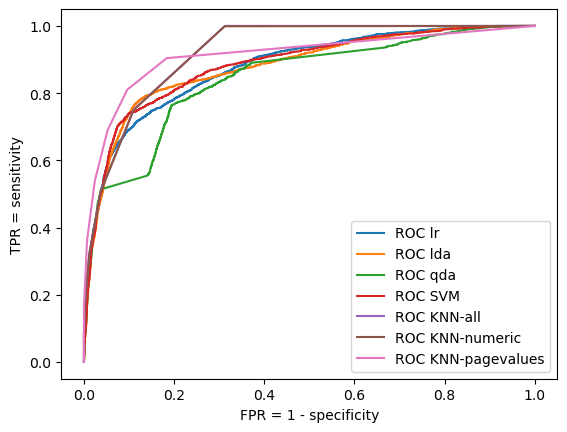

In [42]:
from sklearn.metrics import roc_curve
from sklearn.calibration import CalibratedClassifierCV

calibrated_svc = CalibratedClassifierCV(model_SVM, method='sigmoid', cv='prefit')

def plot_roc(predict_fn, X, y, label=None):
    fprs, tprs, t = roc_curve(y, predict_fn(X)[:,-1])
    
    # Plot the ROC
    plt.plot(fprs, tprs, label="ROC "+label)
    plt.xlabel("FPR = 1 - specificity")
    plt.ylabel("TPR = sensitivity")
    plt.legend()

auc_list = []

for name, model, X in [('lr', model_logistic, X_train_scaled[features_logistic]), 
                    ('lda', model_LDA, X_train_scaled[features_LDA]), 
                    ('qda', model_QDA, X_train_scaled[features_QDA]),
                    ('SVM', calibrated_svc,X_train_scaled[features_SVM]),
                    ('KNN-all', model_KNN_all, X_train),
                    ('KNN-numeric', model_KNN_numeric, X_train[numeric_features]),
                    ('KNN-pagevalues', KNeighborsClassifier(n_neighbors=cv_KNN_numeric.best_params_['n_neighbors']), X_train[['PageValues','ProductRelated','Administrative']])
                   ]:
    model.fit(X, y_train) # sistemare questa parte, fitta i modelli prima in modo che sia tutto ok
    plot_roc(model.predict_proba, X, y_train, name)
    y_prob_pred = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y_train, y_prob_pred)
    auc_list.append(auc)
auc_list